**Question 8.** Given a chemical reaction as follow:

$$
E+S\underset{k_2}{\stackrel{k_1}{\rightleftharpoons}}ES{\stackrel{k_3}{\rightarrow}E+P}
$$


**Question 8.1.** 

Terri A. Grosso gave a [nice talk](http://www.lehman.edu/academics/cmacs/documents/2MathBio.pdf) about this model, namely the Michaelis-Menten Model of enzyme kinetics. Therefore, for the first reaction, which is a reversible reaction, $r_{net}=r_{forward}+r_{reverse}$ applies to all species. Therefore, according to the law of mass action:

$$
\begin{cases}
r_{ES}=k_1[E][S]-k_2[ES]-k_3[ES]\\
r_{E}=k_3[ES]+k_2[ES]-k_1[E][S]\\
r_{S}=-k_1[E][S]+k_2[ES]\\
r_{P}=k_3[ES]
\end{cases}
$$

Upon simplification, we get: 

$$
\begin{cases}
r_{ES}=k_1[E][S]-(k_2+k_3)[ES]\\
r_{E}=-k_1[E][S]+(k_2+k_3)[ES]\\
r_{S}=-k_1[E][S]+k_2[ES]\\
r_{P}=k_3[ES]
\end{cases}
$$

**Question 8.2.** 

Write a code to numerically solve these four equations using the fourth-order RungeKutta method. For this exercise, assume that the initial concentration of E is 1 µM, the initial concentration of S is 10 µM, and the initial concentrations of ES and P are both 0. The rate constants are: k1 =100/µM/min, k2 =600/min, k3 =150/min. 

Therefore, the key functions needed to be solved can be written as:

$$
\begin{cases}
\frac{d[ES]}{dt}=100/µM/min\times[E][S]-750/min\times[ES]\\
\frac{d[E]}{dt}=-100/µM/min\times[E][S]+750/min\times[ES]\\
\frac{d[S]}{dt}=-100/µM/min\times[E][S]+600/min\times[ES]\\
\frac{d[P]}{dt}=150/min\times[ES]
\end{cases}
$$

given conditions that:
$$
\begin{cases}
[E]_{0}=1 µM \\
[S]_{0}=10 µM \\ 
[ES]_{0}=[P]_{0}=0 µM
\end{cases}
$$

Using the enzyme conservation law, we know that $[ES] = [E]_0 - [{E}]=1 µM- [{E}]$ and $[P]=[S]_0-[ES]-[S]$. Therefore, 

$$
\begin{cases}
[P]=9µM+[E]-[S]\\
[ES]=1 µM- [{E}]
\end{cases}
$$ 

Suppose that $e=[E],s=[S]$. Therefore, the key functions needed to be written as:

$$
\begin{cases}
\frac{d(1 - e)}{dt}=100es-750(1-e)\\
\frac{de}{dt}=-100es+750(1-e)\\
\frac{ds}{dt}=-100es+600(1-e)\\
\frac{d(e-s)}{dt}=150(1-e) \tag{1}    
\end{cases}
$$

which can be further simplified as:

$$
\begin{cases}
\frac{de}{dt}=-100es-750e+750\\
\frac{ds}{dt}=-100es-600e+600\\
\end{cases}
$$

given conditions that:
$$
\begin{cases}
e_{0}=1 \\
s_{0}=10 \\ 
\end{cases}
$$

And then we need to solve the equations with the fourth-order Runge-Kutta method. (Thinking COPASI can do the job... I have never studied ODE...)

[References: [1](https://www.geeksforgeeks.org/runge-kutta-4th-order-method-solve-differential-equation/),[2](https://www.zhihu.com/question/45259131/answer/1603755435),[3](http://hplgit.github.io/primer.html/doc/pub/ode2/._ode2-readable003.html) ]

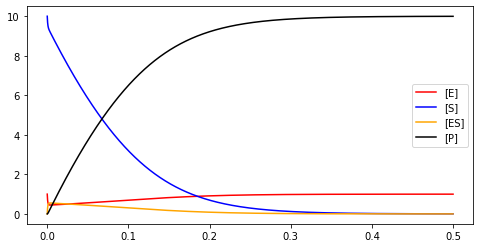

In [1]:
# This solution is offered in Numerical Python but it doesn't use RK4， and uses the LSODA algorithm.

import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
import sympy
    
# initial steps
def f(es, t):
    e, s = es
    return [-100 * e * s - 750 * e + 750, -100 * e * s -600 * e + 600]
es0=[1,10]
t = np.linspace (0, 0.5, 100000)
es_t = integrate.odeint(f, es0, t)
es_t.shape

fig, axes = plt.subplots(figsize=(8, 4))
axes.plot(t, es_t[:,0], 'r', label="[E]")
axes.plot(t, es_t[:,1], 'b', label="[S]")
axes.plot(t, 1-es_t[:,0], 'orange', label="[ES]")
axes.plot(t, 9+es_t[:,0]-es_t[:,1], 'black', label="[P]")
axes.legend()

I tried integrate.RK45 but somehow it doesn't work for me... The rest of the code will be using MATLAB, following the guideline [here](https://wps.prenhall.com/wps/media/objects/884/905485/chapt4/proj4.3A/proj4-3A.pdf). (If you want to run MATLAB here, you just need [this](https://github.com/Calysto/matlab_kernel).)

http://m2matlabdb.ma.tum.de/rk4_systems.m?MP_ID=413
https://zhuanlan.zhihu.com/p/148227521

In [5]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

In [6]:
# 易感方程
def fa(N, a, b, beta):
    fa = -beta*a*b
    return fa

# 感染方程
def fb(N, a, b, beta, gamma):
    fb = beta*a*b - gamma*b
    return fb

# 治愈/死亡 方程
def fc(N, b, gamma):
    fc = gamma*b
    return fc


def rK4(N, a, b, c, fa, fb, fc, beta, gamma, hs):
    a1 = fa(N, a, b, beta)*hs
    b1 = fb(N, a, b, beta, gamma)*hs
    c1 = fc(N, b, gamma)*hs
    ak = a + a1*0.5
    bk = b + b1*0.5
    ck = c + c1*0.5
    a2 = fa(N, ak, bk, beta)*hs
    b2 = fb(N, ak, bk, beta, gamma)*hs
    c2 = fc(N, bk, gamma)*hs
    ak = a + a2*0.5
    bk = b + b2*0.5
    ck = c + c2*0.5
    a3 = fa(N, ak, bk, beta)*hs
    b3 = fb(N, ak, bk, beta, gamma)*hs
    c3 = fc(N, bk, gamma)*hs
    ak = a + a3
    bk = b + b3
    ck = c + c3
    a4 = fa(N, ak, bk, beta)*hs
    b4 = fb(N, ak, bk, beta, gamma)*hs
    c4 = fc(N, bk, gamma)*hs
    a = a + (a1 + 2*(a2 + a3) + a4)/6
    b = b + (b1 + 2*(b2 + b3) + b4)/6
    c = c + (c1 + 2*(c2 + c3) + c4)/6
    return a, b, c

In [7]:
def SIR(N, b0, beta, gamma, hs):
    
    """
    N = 人口总数
    beta = transition rate S->I
    gamma = transition rate I->R
    k =  表示网络的恒定度分布（其中     找到具有不同连通性的节点的概率呈指数级衰减
    hs = 数值积分的跳跃步骤
    """
    
    # 初始状况
    a = float(N-1)/N -b0
    b = float(1)/N +b0
    c = 0.

    sus, inf, rec= [],[],[]
    for i in range(10000): # 运行一定数量的时间
        sus.append(a)
        inf.append(b)
        rec.append(c)
        a,b,c = rK4(N, a, b, c, fa, fb, fc, beta, gamma, hs)

    return sus, inf, rec



/Users/ydchen/miniforge3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 27169 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/ydchen/miniforge3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 22411 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/ydchen/miniforge3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 26102 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/ydchen/miniforge3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 38388 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/ydchen/miniforge3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 26102 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/ydchen/miniforge3/lib/python3.9/site-packages/matplotlib/backends/back

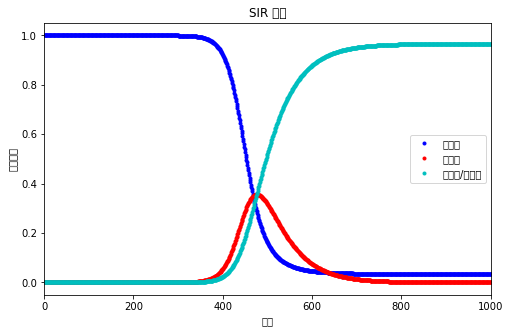

In [8]:
N = 7800*(10**6)
b0 = 0
beta = 0.7
gamma = 0.2
hs = 0.1

sus, inf, rec = SIR(N, b0, beta, gamma, hs)

f = plt.figure(figsize=(8,5)) 
plt.plot(sus, 'b.', label='易感者');
plt.plot(inf, 'r.', label='感染者');
plt.plot(rec, 'c.', label='治愈者/死亡者');
plt.title("SIR 模型")
plt.xlabel("时间", fontsize=10);
plt.ylabel("人口比例", fontsize=10);
plt.legend(loc='best')
plt.xlim(0,1000)
plt.savefig('SIR_example.png')
plt.show()


In [9]:
t = t0;
x = x0;
y = y0; 

NameError: name 't0' is not defined

In [ ]:
result = [t0,x0,y0]; 

In [ ]:
for i = 1:n,
 k1 = f(t,x,y);
 l1 = g(t,x,y); % left-hand slopes
 k2 = f(t+h/2,x+h*k1/2,y+h*l1/2);
 l2 = g(t+h/2,x+h*k1/2,y+h*l1/2); % 1st midpt slopes
 k3 = f(t+h/2,x+h*k2/2,y+h*l2/2);
 l3 = g(t+h/2,x+h*k2/2,y+h*l2/2); % 2nd midpt slopes
 k4 = f(t+h,x+h*k3,y+h*l3);
 l4 = g(t+h,x+h*k3,y+h*l3); % right-hand slopes
 k = (k1+2*k2+2*k3+k4)/6; % average x-slope
 l = (l1+2*l2+2*l3+l4)/6; % average y-slope
 x = x + h*k; % Euler step to update x
 y = y + h*l; % Euler step to update y 
 t = t + h; % update t
 if floor(i/m) == i/m,
     result = [result;[180*t,x,y]];
     end % adjoin new row of data
 end 

In [ ]:
result

**Question 8.3.**

We define the velocity, V, of the enzymatic reaction to be the rate of change of the product P. Plot the velocity V as a function of the concentration of the substrate S. You should find that, when the concentrations of S are small, the velocity V increases approximately linearly. At large concentrations of S, however, the velocity V saturates to a maximum value, Vm . Find this value V m from your plot.

**Mathmatically,** Consider $V$ a function of $[S]$. Hence, $V=\frac{d[P]}{dt}=f([S])$. According to the Michaelis–Menten equation, $V = \frac{\mathrm{d} [P]}{\mathrm{d} t} = V_\max \frac{[S]}{K_\mathrm{M} + [S]} $. When $[S]$ approaches $+\infty$, $V$ approaches to $V_\max= k_\mathrm{3} [E]_0 \frac{[S]}{K_\mathrm{M} + [S]}=150µM/min$.

**Computationally,** we have previously know that $V=150-150e$